In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv('/content/Hospital_Finance.csv')

In [6]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [7]:
from prophet import Prophet

In [8]:
df.tail(150)

,Hospital ID,Date,Revenue,Expenses
0,H1,01-02-2020,9398598.0,7530282.0
1,H1,02-02-2020,6436361.0,7810390.0
2,H1,03-02-2020,8966659.0,7167199.0
3,H1,04-02-2020,5207746.0,6334585.0
4,H1,05-02-2020,6184203.0,7327760.0
5,H1,06-02-2020,8539620.0,6805552.0
6,H1,07-02-2020,9990998.0,5989310.0
7,H1,08-02-2020,NaN,5574714.0
8,H1,09-02-2020,8215079.0,4300685.0
9,H1,10-02-2020,6248045.0,8757464.0


In [9]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [10]:
df.head()

,Hospital ID,Date,Revenue,Expenses
0,H1,2020-02-01,9398598.0,7530282.0
1,H1,2020-02-02,6436361.0,7810390.0
2,H1,2020-02-03,8966659.0,7167199.0
3,H1,2020-02-04,5207746.0,6334585.0
4,H1,2020-02-05,6184203.0,7327760.0


<ipython-input-11-b6ba33bbcbc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_edit.rename(columns={'Date':'ds','Revenue':'y'},inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwfbotsn1/44mmuoli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwfbotsn1/9iyj5ljz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=376', 'data', 'file=/tmp/tmpwfbotsn1/44mmuoli.json', 'init=/tmp/tmpwfbotsn1/9iyj5ljz.json', 'output', 'file=/tmp/tmpwfbotsn1/prophet_m

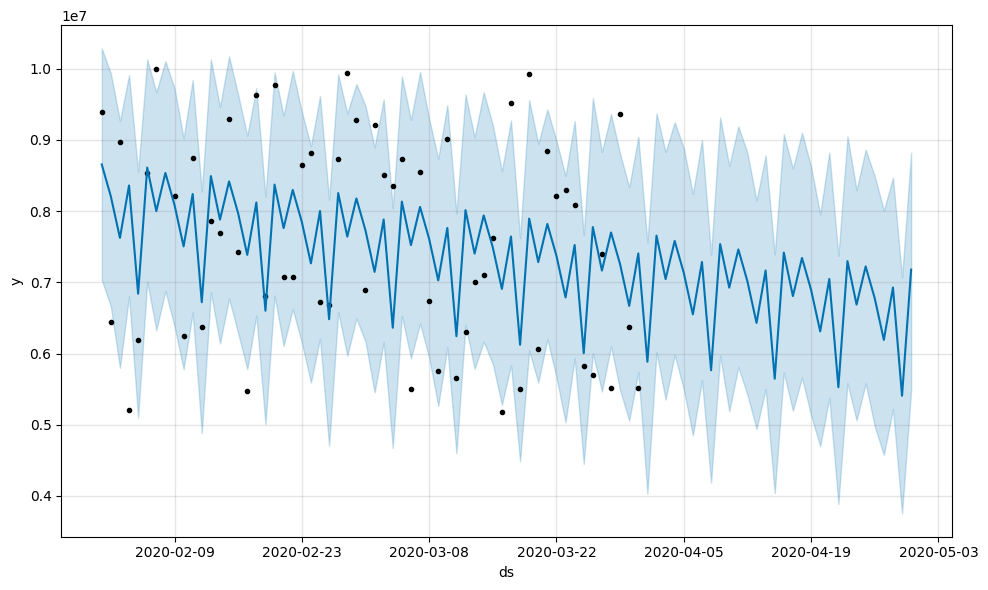

In [11]:
ts_data_edit = df[['Date','Revenue']]
ts_data_edit.rename(columns={'Date':'ds','Revenue':'y'},inplace=True)
model=Prophet()
model.fit(ts_data_edit)

#make future prediction
future=model.make_future_dataframe(periods=30)
forecast = model.predict(future)

#visualize the forecast
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
fig = model.plot(forecast)

<ipython-input-23-f37fa5f4a6a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_edit.rename(columns={'Date':'ds',i:'y'},inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwfbotsn1/9kh0lz_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwfbotsn1/2yh8zuha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99567', 'data', 'file=/tmp/tmpwfbotsn1/9kh0lz_6.json', 'init=/tmp/tmpwfbotsn1/2yh8zuha.json', 'output', 'file=/tmp/tmpwfbotsn1/prophet_modelxn

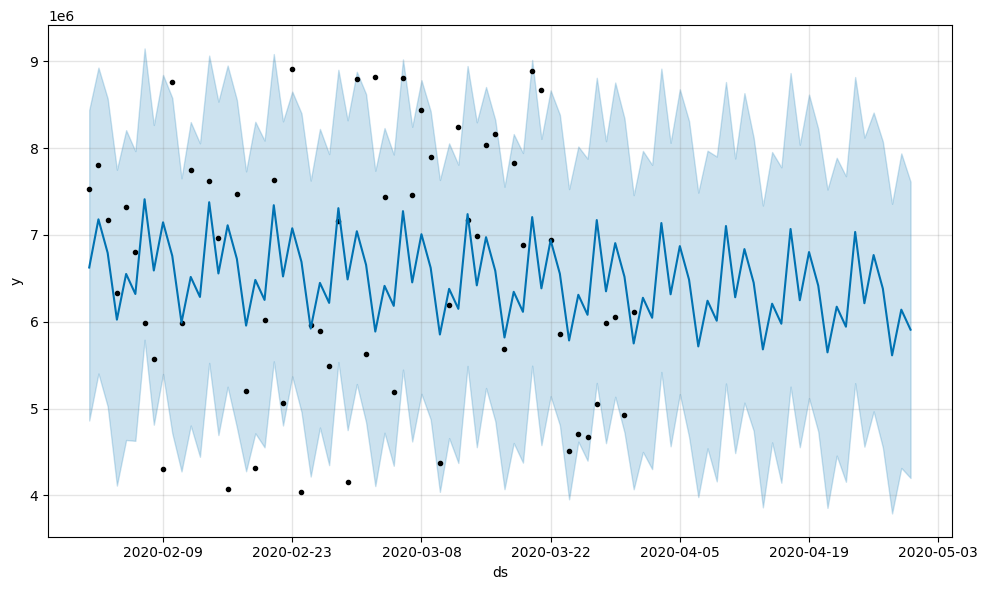

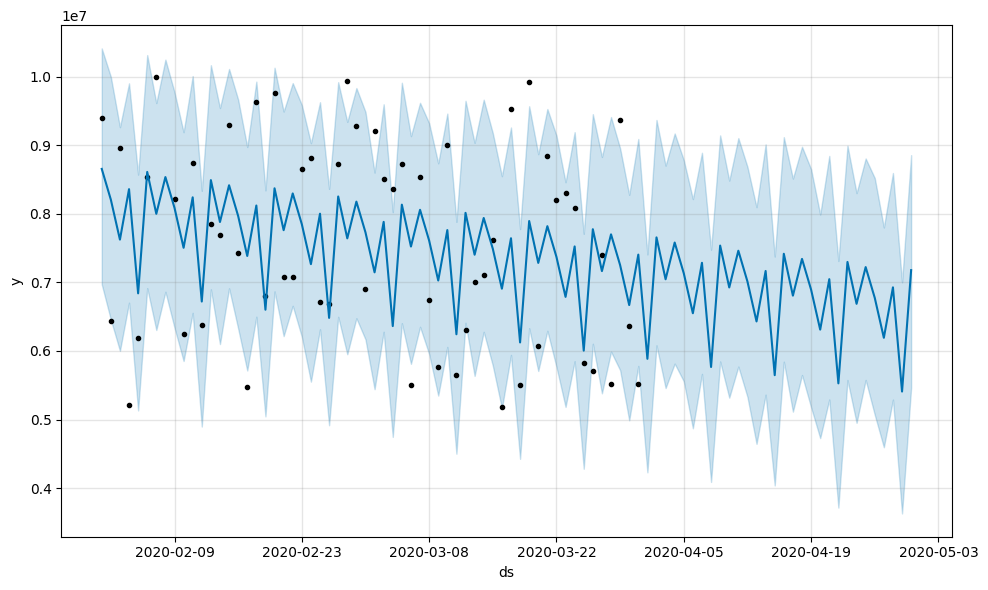

In [23]:
cols = ["Expenses","Revenue"]
listResult = []
for i in cols:
  ts_data_edit = df[['Date',i]]
  ts_data_edit.rename(columns={'Date':'ds',i:'y'},inplace=True)
  model=Prophet()
  model.fit(ts_data_edit)

  #make future prediction
  future=model.make_future_dataframe(periods=30)
  forecast = model.predict(future)
  forecast_filter = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(30)
  forecast_filter["Variable"] = i
  listResult.append(forecast_filter)
  #visualize the forecast
  from prophet.plot import add_changepoints_to_plot
  import matplotlib.pyplot as plt
  fig = model.plot(forecast)

In [17]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [25]:
pd.concat(listResult).to_csv("forecast.csv")